# Comparison offline and GPF

In [1]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
offline_path = "/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/1FDR/combined/txt/"
offline_modpept = pd.read_csv(
    os.path.join(offline_path, "modificationSpecificPeptides.txt"), sep="\t"
)
offline_msscan = pd.read_csv(os.path.join(offline_path, "msScans.txt"), sep="\t")
offline_evidence = pd.read_csv(os.path.join(offline_path, "evidence.txt"), sep="\t")

/tmp/ipykernel_817046/1985208989.py:6: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  offline_evidence = pd.read_csv(os.path.join(offline_path, "evidence.txt"), sep="\t")


In [7]:
GPF_modpept_path = "/cmnfs/proj/ORIGINS/data/ecoli/GPF/MQ/standard/combined/txt/modificationSpecificPeptides.txt"
GPF_modpept = pd.read_csv(GPF_modpept_path, sep="\t")
GPF_modpept["ModPept"] = GPF_modpept["Sequence"] + GPF_modpept["Modifications"]
GPF_msscan_path = (
    "/cmnfs/proj/ORIGINS/data/ecoli/GPF/MQ/standard/combined/txt/msScans.txt"
)
GPF_msscan = pd.read_csv(GPF_msscan_path, sep="\t")
GPF_evidence_path = (
    "/cmnfs/proj/ORIGINS/data/ecoli/GPF/MQ/standard/combined/txt/evidence.txt"
)
GPF_evidence = pd.read_csv(GPF_evidence_path, sep="\t")

In [4]:
DDA_path = "/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/MQ/combined/txt/"
DDA_modpept = pd.read_csv(os.path.join(DDA_path, "evidence_1.txt"), sep="\t")
DDA_modpept["ModPept"] = DDA_modpept["Sequence"] + DDA_modpept["Modifications"]
DDA_msscan = pd.read_csv(os.path.join(DDA_path, "msScans.txt"), sep="\t")
DDA_evidence = pd.read_csv(os.path.join(DDA_path, "evidence.txt"), sep="\t")

# MS Scans

In [5]:
DDA_msscan1 = DDA_msscan[DDA_msscan["Experiment"] == 1]

<Axes: >

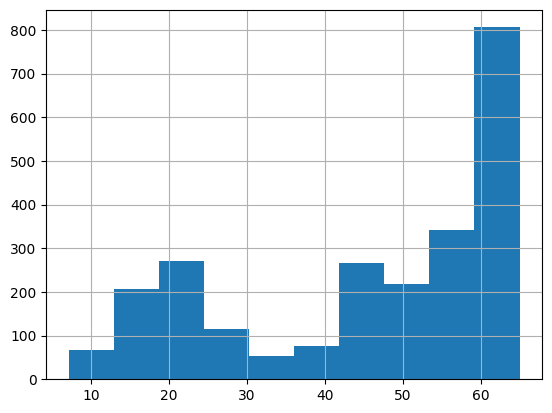

In [6]:
DDA_msscan1["MS/MS identification rate [%]"].hist()

In [19]:
summary = pd.read_csv(os.path.join(DDA_path, "summary.txt"), sep="\t")

# ID counts

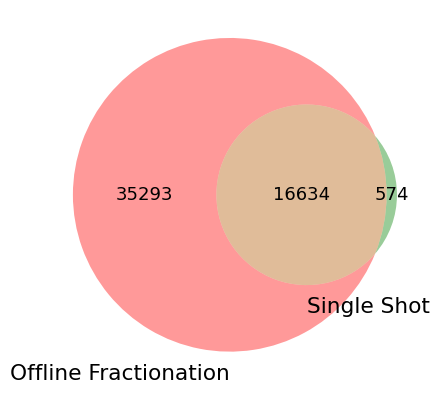

In [7]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.rc("font", size=13)
venn2(
    [
        set(offline_evidence["Modified sequence"].to_list()),
        set(DDA_modpept["Modified sequence"].to_list()),
        # set(GPF_evidence["Modified sequence"]),
    ],
    set_labels=("Offline Fractionation", "Single Shot"),
)

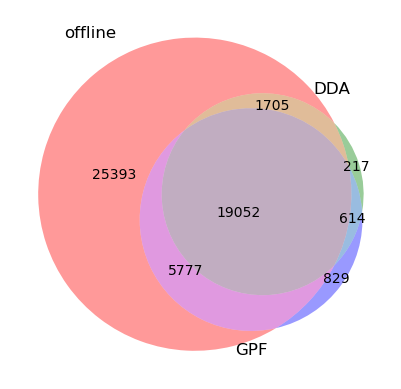

In [6]:
from matplotlib_venn import venn3

venn3(
    [
        set(offline_evidence["Modified sequence"].to_list()),
        set(DDA_evidence["Modified sequence"].to_list()),
        set(GPF_evidence["Modified sequence"]),
    ],
    set_labels=("Offline Fractionation", "Single Shot", "GPF"),
)

# Isotope pattern similarity

In [10]:
maxquant_file_dict = "/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/combined/txt/evidence_1_transfer_RT_pred_filtered_withIso.pkl"
maxquant_result_dict = pd.read_pickle(maxquant_file_dict)

In [11]:
maxquant_result_dict = (
    maxquant_result_dict.groupby(["Modified sequence"]).first().reset_index()
)

In [ ]:
from optimization.dictionary import GetNumHighCorrFeatures

AsDict = maxquant_result_dict[[""]]

# Charge distribution of modified peptides

# For offline

In [5]:
# count number of different charge for the same modeified sequence in offline evidence
mod_seq_charge = offline_evidence.groupby("Modified sequence").agg(
    {"Charge": "nunique"}
)["Charge"]

In [17]:
mod_seq_charge.value_counts(normalize=True)

1    0.797658
2    0.191191
3    0.011150
Name: Charge, dtype: float64

<Figure size 600x600 with 0 Axes>

<Axes: >

([<matplotlib.axis.XTick at 0x7f9337654520>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

Text(0.5, 1.0, 'Number of charges per modified sequence (Offline Reference)')

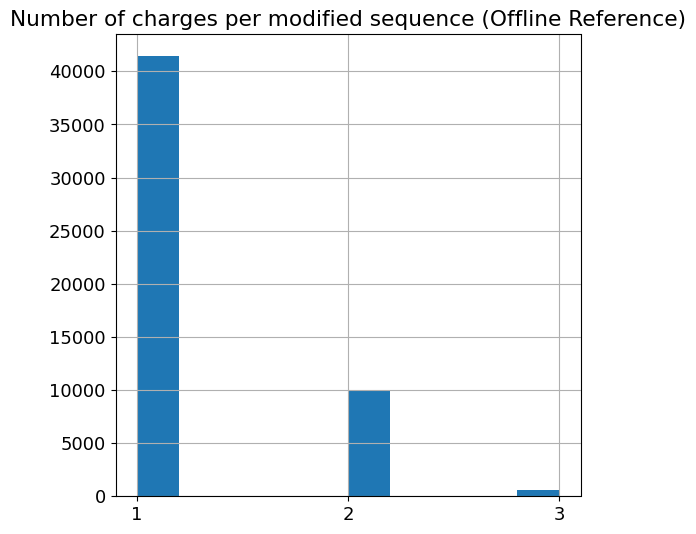

In [16]:
import matplotlib.pyplot as plt

plt.rc("font", size=13)
plt.figure(figsize=(6, 6))
mod_seq_charge.hist()
plt.xticks([1, 2, 3])
plt.title("Number of charges per modified sequence (Offline Reference)")

# for single shot

In [27]:
ss_exp1 = DDA_evidence.loc[DDA_evidence["Experiment"] == 1]

In [28]:
# count number of different charge for the same modeified sequence in offline evidence
mod_seq_charge = ss_exp1.groupby("Modified sequence").agg({"Charge": "nunique"})[
    "Charge"
]

In [29]:
mod_seq_charge.value_counts(normalize=True)

1    0.900221
2    0.097571
3    0.002208
Name: Charge, dtype: float64

<Figure size 600x600 with 0 Axes>

<Axes: >

([<matplotlib.axis.XTick at 0x7f933795f430>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

Text(0.5, 1.0, 'Number of charges per modified sequence (Single shot DDA)')

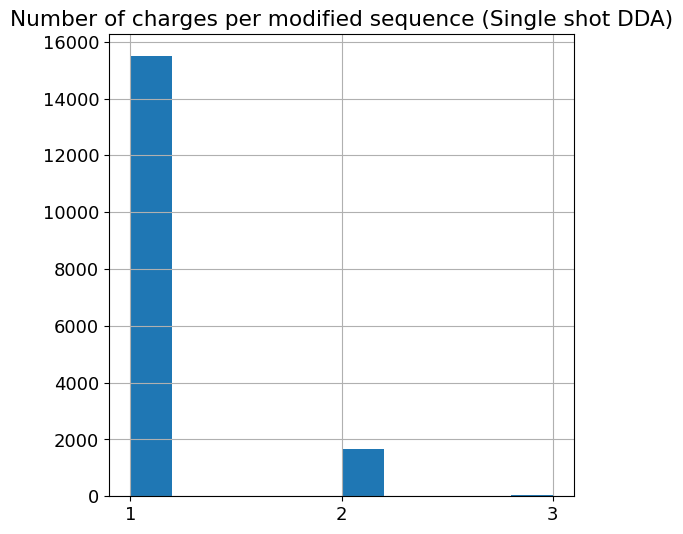

In [31]:
plt.rc("font", size=13)
plt.figure(figsize=(6, 6))
mod_seq_charge.hist()
plt.xticks([1, 2, 3])
plt.title("Number of charges per modified sequence (Single shot DDA)")